# Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N           = 1000
xDataRandom = np.random.normal(0, 100, N)
yDataRandom = np.random.normal(0, 100, N)
print (len(xDataRandom))
print (xDataRandom.shape)

1000
(1000,)


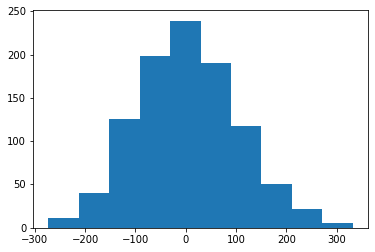

In [3]:
plt.hist(xDataRandom)
plt.show()

In [4]:
N     = 1000
xTrue = np.linspace(0, 1000, N)
yTrue = 3 * xTrue

#xData = xTrue + np.random.normal(0, 100, N)
#yData = yTrue + np.random.normal(0, 100, N)

xData = xTrue + xDataRandom
yData = yTrue + yDataRandom

xData = np.reshape(xData, (N, 1))
yData = np.reshape(yData, (N, 1))

data  = np.hstack((xData, yData))
print (len(data))
print (data.shape)

1000
(1000, 2)


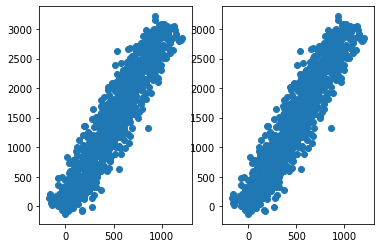

In [5]:
%matplotlib inline

fig,(axleft,axright) = plt.subplots(nrows=1,ncols=2, sharex=True)
axleft.scatter(xData, yData)
axright.scatter(data[:,0],data[:,1] )
plt.show()

In [6]:
print (data.mean(axis=0))
print (data.mean(axis=0)[0]*3) # correct, as the  
print ( data.std(axis=0))

[ 504.54966501 1498.50402092]
1513.6489950189784
[305.83000059 873.02714143]


In [7]:
mu   = data.mean(axis=0)
data = data - mu
# data = (data - mu)/data.std(axis=0)  # Uncommenting this reproduces mlab.PCA results
eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
print (eigenvectors)
print (eigenvalues)
projected_data = np.dot(data, eigenvectors)

[[-0.31541842 -0.9489527 ]
 [-0.9489527   0.31541842]]
[29072.72809151  3238.03339133]


In [8]:
print (projected_data.std(axis=0))
sigma = projected_data.std(axis=0).mean()
print ("sigma")
print (sigma)
print ("mu")
print (mu)
print ("eigenvectors")
print (eigenvectors)
print ("-------------------------------")
print (sigma * eigenvectors)
print ("-------------------------------")
print (mu + sigma * eigenvectors)

# the first  column of mu is added to the first  column of eigenvectors matrix  
# the second column of mu is added to the second column of eigenvectors matrix  

[919.36038564 102.39560656]
sigma
510.8779961010669
mu
[ 504.54966501 1498.50402092]
eigenvectors
[[-0.31541842 -0.9489527 ]
 [-0.9489527   0.31541842]]
-------------------------------
[[-161.14032893 -484.79905249]
 [-484.79905249  161.14032893]]
-------------------------------
[[ 343.40933608 1013.70496843]
 [  19.75061252 1659.64434985]]


In [9]:
for axis in eigenvectors:
    start, end = mu, mu + sigma * axis
    print (start)
    print (axis)
    print (end)
    print (" ------------------- ")
# the first  axis is the first  column of the eigenvectors matrix 
# the second axis is the second column of the eigenvectors matrix 

[ 504.54966501 1498.50402092]
[-0.31541842 -0.9489527 ]
[ 343.40933608 1013.70496843]
 ------------------- 
[ 504.54966501 1498.50402092]
[-0.9489527   0.31541842]
[  19.75061252 1659.64434985]
 ------------------- 


the first column of eigenvectors matrix  [-0.31541842 -0.9489527 ]
the second column of eigenvectors matrix  [-0.9489527   0.31541842]
the axis are  [-0.31541842 -0.9489527 ]
the axis are  [-0.9489527   0.31541842]


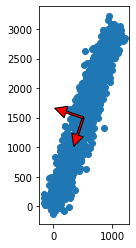

In [10]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(xData, yData)
print( "the first column of eigenvectors matrix ", eigenvectors[0])
print( "the second column of eigenvectors matrix ", eigenvectors[1])
for axis in eigenvectors:
    print ("the axis are ", axis )   
    start, end = mu, mu + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.show()

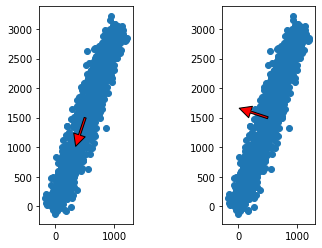

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig,(axleft,axright) = plt.subplots(nrows=1,ncols=2, sharex=True)

axleft.scatter(xData, yData)
axis = eigenvectors[0]
start, end = mu, mu + sigma * axis
axleft.annotate(
    '', xy=end, xycoords='data',
    xytext=start, textcoords='data',
    arrowprops=dict(facecolor='red', width=2.0))
axleft.set_aspect('equal')

axright.scatter(xData, yData)
axis = eigenvectors[1]
start, end = mu, mu + sigma * axis
axright.annotate(
    '', xy=end, xycoords='data',
    xytext=start, textcoords='data',
    arrowprops=dict(facecolor='red', width=2.0))
axright.set_aspect('equal')

plt.show()

In [ ]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause
# This is the classic pca work. It is in every book with a chapter on PCA decomposition0
# It works in Python 2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()